INSURANCE DATASET QUESTION

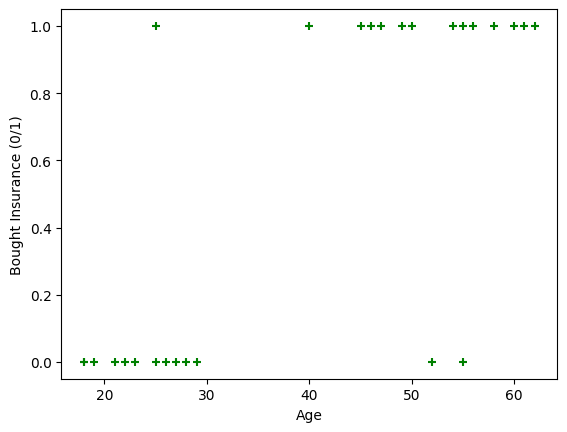

Test Accuracy (single split): 1.0
Cross-validation accuracies: [1.         0.83333333 0.8        1.         0.8       ]
Mean CV accuracy: 0.8866666666666667


C:\Users\kksha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


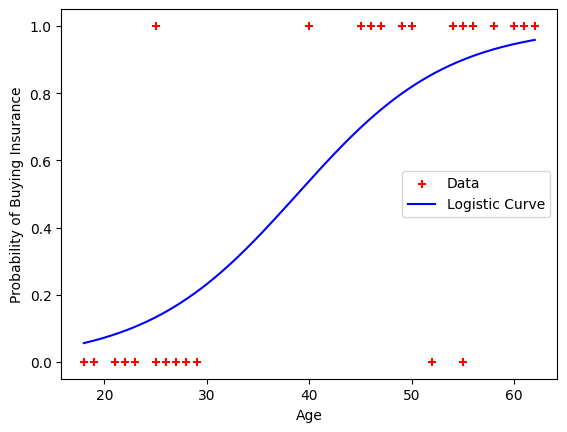

In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression


df = pd.read_csv("insurance_data.csv")


plt.scatter(df.age, df.bought_insurance, marker='+', color='green')
plt.xlabel("Age")
plt.ylabel("Bought Insurance (0/1)")
plt.show()


X = df[['age']]        
y = df['bought_insurance'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print("Test Accuracy (single split):", model.score(X_test, y_test))


kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(LogisticRegression(), X, y, cv=kf, scoring='accuracy')

print("Cross-validation accuracies:", scores)
print("Mean CV accuracy:", scores.mean())


model = LogisticRegression()
model.fit(X, y)


x_test = np.linspace(df.age.min(), df.age.max(), 200).reshape(-1, 1)
y_prob = model.predict_proba(x_test)[:, 1]


plt.scatter(df.age, df.bought_insurance, marker='+', color='red', label="Data")
plt.plot(x_test, y_prob, color='blue', label="Logistic Curve")
plt.xlabel("Age")
plt.ylabel("Probability of Buying Insurance")
plt.legend()
plt.show()


BMI QUESTION

Cross-validation accuracies: [0.95 0.9  0.8  0.95 1.  ]
Mean CV accuracy: 0.9200000000000002


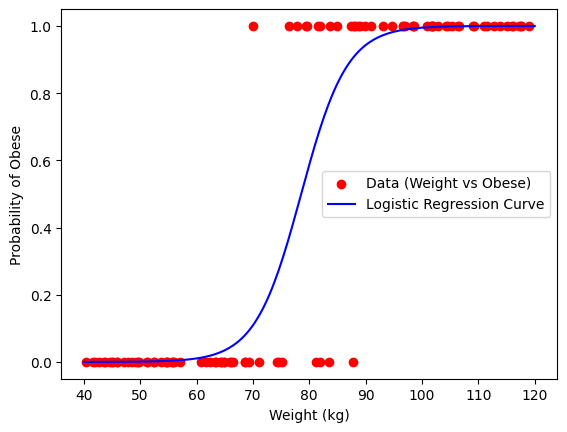

In [19]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt


np.random.seed(42)

weight = np.random.uniform(40, 120, 100)
prob = 1 / (1 + np.exp(-(weight - 80)/5))
labels = (np.random.rand(100) < prob).astype(int)


X = weight.reshape(-1, 1)  
y = labels                 
model = LogisticRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("Cross-validation accuracies:", scores)
print("Mean CV accuracy:", scores.mean())


model.fit(X, y)

x_test = np.linspace(40, 120, 200).reshape(-1, 1)
y_prob = model.predict_proba(x_test)[:, 1]

plt.scatter(weight, labels, color="red", label="Data (Weight vs Obese)")
plt.plot(x_test, y_prob, color="blue", label="Logistic Regression Curve")
plt.xlabel("Weight (kg)")
plt.ylabel("Probability of Obese")
plt.legend()
plt.show()
